<img src="../../predictioNN_Logo_JPG(72).jpg" width=200>

---

## Check Deposit Fraud with Synthetic Data
### Supplementary Exercise on Exploratory Data Analysis

Last updated: January 6, 2023

Purpose:  

Banks need to detect if checks are fraudulent, and properties of the check (amount, whether it is signed, ...) can be useful predictors.

This is a short EDA analysis used in the book: *From Concepts to Code: Introduction to Data Science.*   
A synthetic check dataset is generated below, and then analysis proceeds. Don't change the dataset generation code!

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Create Dataset

In [4]:
rows = 1100
df = pd.DataFrame(columns=['checkid','check_amount','check_signed','is_fraud'])
df['checkid'] = range(rows)
df['check_amount'] = np.random.uniform(1,10000,rows).round(2)
df['check_signed'] = 1
df['is_fraud'] = 0

In [5]:
# set up fraud records
fraud_rows = [22, 101, 510, 778, 901]
df.loc[fraud_rows, 'check_signed'] = 0
df.loc[fraud_rows, 'is_fraud'] = 1

df.loc[101, 'check_amount'] = 10000
df.loc[510, 'check_amount'] = 5000
df.loc[778, 'check_amount'] = 1000

# walk back some values to not make predictors so obvious
df.loc[22, 'is_fraud'] = 0
df.loc[101, 'check_signed'] = 1


In [6]:
df.loc[fraud_rows]

,checkid,check_amount,check_signed,is_fraud
22,22,9903.85,0,0
101,101,10000.00,1,1
510,510,5000.00,0,1
778,778,1000.00,0,1
901,901,3298.91,0,1


In [7]:
df.to_csv('../datasets/check_deposit_fraud.csv', index=False)

### Import data

In [8]:
df = pd.read_csv('../datasets/check_deposit_fraud.csv')
df.head(3)

,checkid,check_amount,check_signed,is_fraud
0,0,3120.94,1,0
1,1,7791.80,1,0
2,2,2271.42,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   checkid       1100 non-null   int64  
 1   check_amount  1100 non-null   float64
 2   check_signed  1100 non-null   int64  
 3   is_fraud      1100 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 34.5 KB


In [10]:
df.describe()

,checkid,check_amount,check_signed,is_fraud
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,549.500000,4987.804636,0.996364,0.003636
std,317.686953,2899.841440,0.060220,0.060220
min,0.000000,13.640000,0.000000,0.000000
25%,274.750000,2346.195000,1.000000,0.000000
50%,549.500000,5091.770000,1.000000,0.000000
75%,824.250000,7559.680000,1.000000,0.000000
max,1099.000000,10000.000000,1.000000,1.000000


Look at the fraud checks

In [11]:
df[df.is_fraud==1]

,checkid,check_amount,check_signed,is_fraud
101,101,10000.00,1,1
510,510,5000.00,0,1
778,778,1000.00,0,1
901,901,3298.91,0,1


Look at the unsigned checks

In [12]:
df[df.check_signed==0]

,checkid,check_amount,check_signed,is_fraud
22,22,9903.85,0,0
510,510,5000.00,0,1
778,778,1000.00,0,1
901,901,3298.91,0,1


### Univariate Analysis

Look at frequency distribution of **target variable**

In [13]:
df.is_fraud.value_counts()

0    1096
1       4
Name: is_fraud, dtype: int64

In [14]:
df.is_fraud.value_counts(normalize=True)

0    0.996364
1    0.003636
Name: is_fraud, dtype: float64

Look at frequency distribution of **binary variable**

In [15]:
df.check_signed.value_counts()

1    1096
0       4
Name: check_signed, dtype: int64

In [16]:
df.check_signed.value_counts(normalize=True)

1    0.996364
0    0.003636
Name: check_signed, dtype: float64

Looking at **check amount**

In [17]:
df.check_amount.describe()

count     1100.000000
mean      4987.804636
std       2899.841440
min         13.640000
25%       2346.195000
50%       5091.770000
75%       7559.680000
max      10000.000000
Name: check_amount, dtype: float64

<AxesSubplot:xlabel='check_amount', ylabel='Count'>

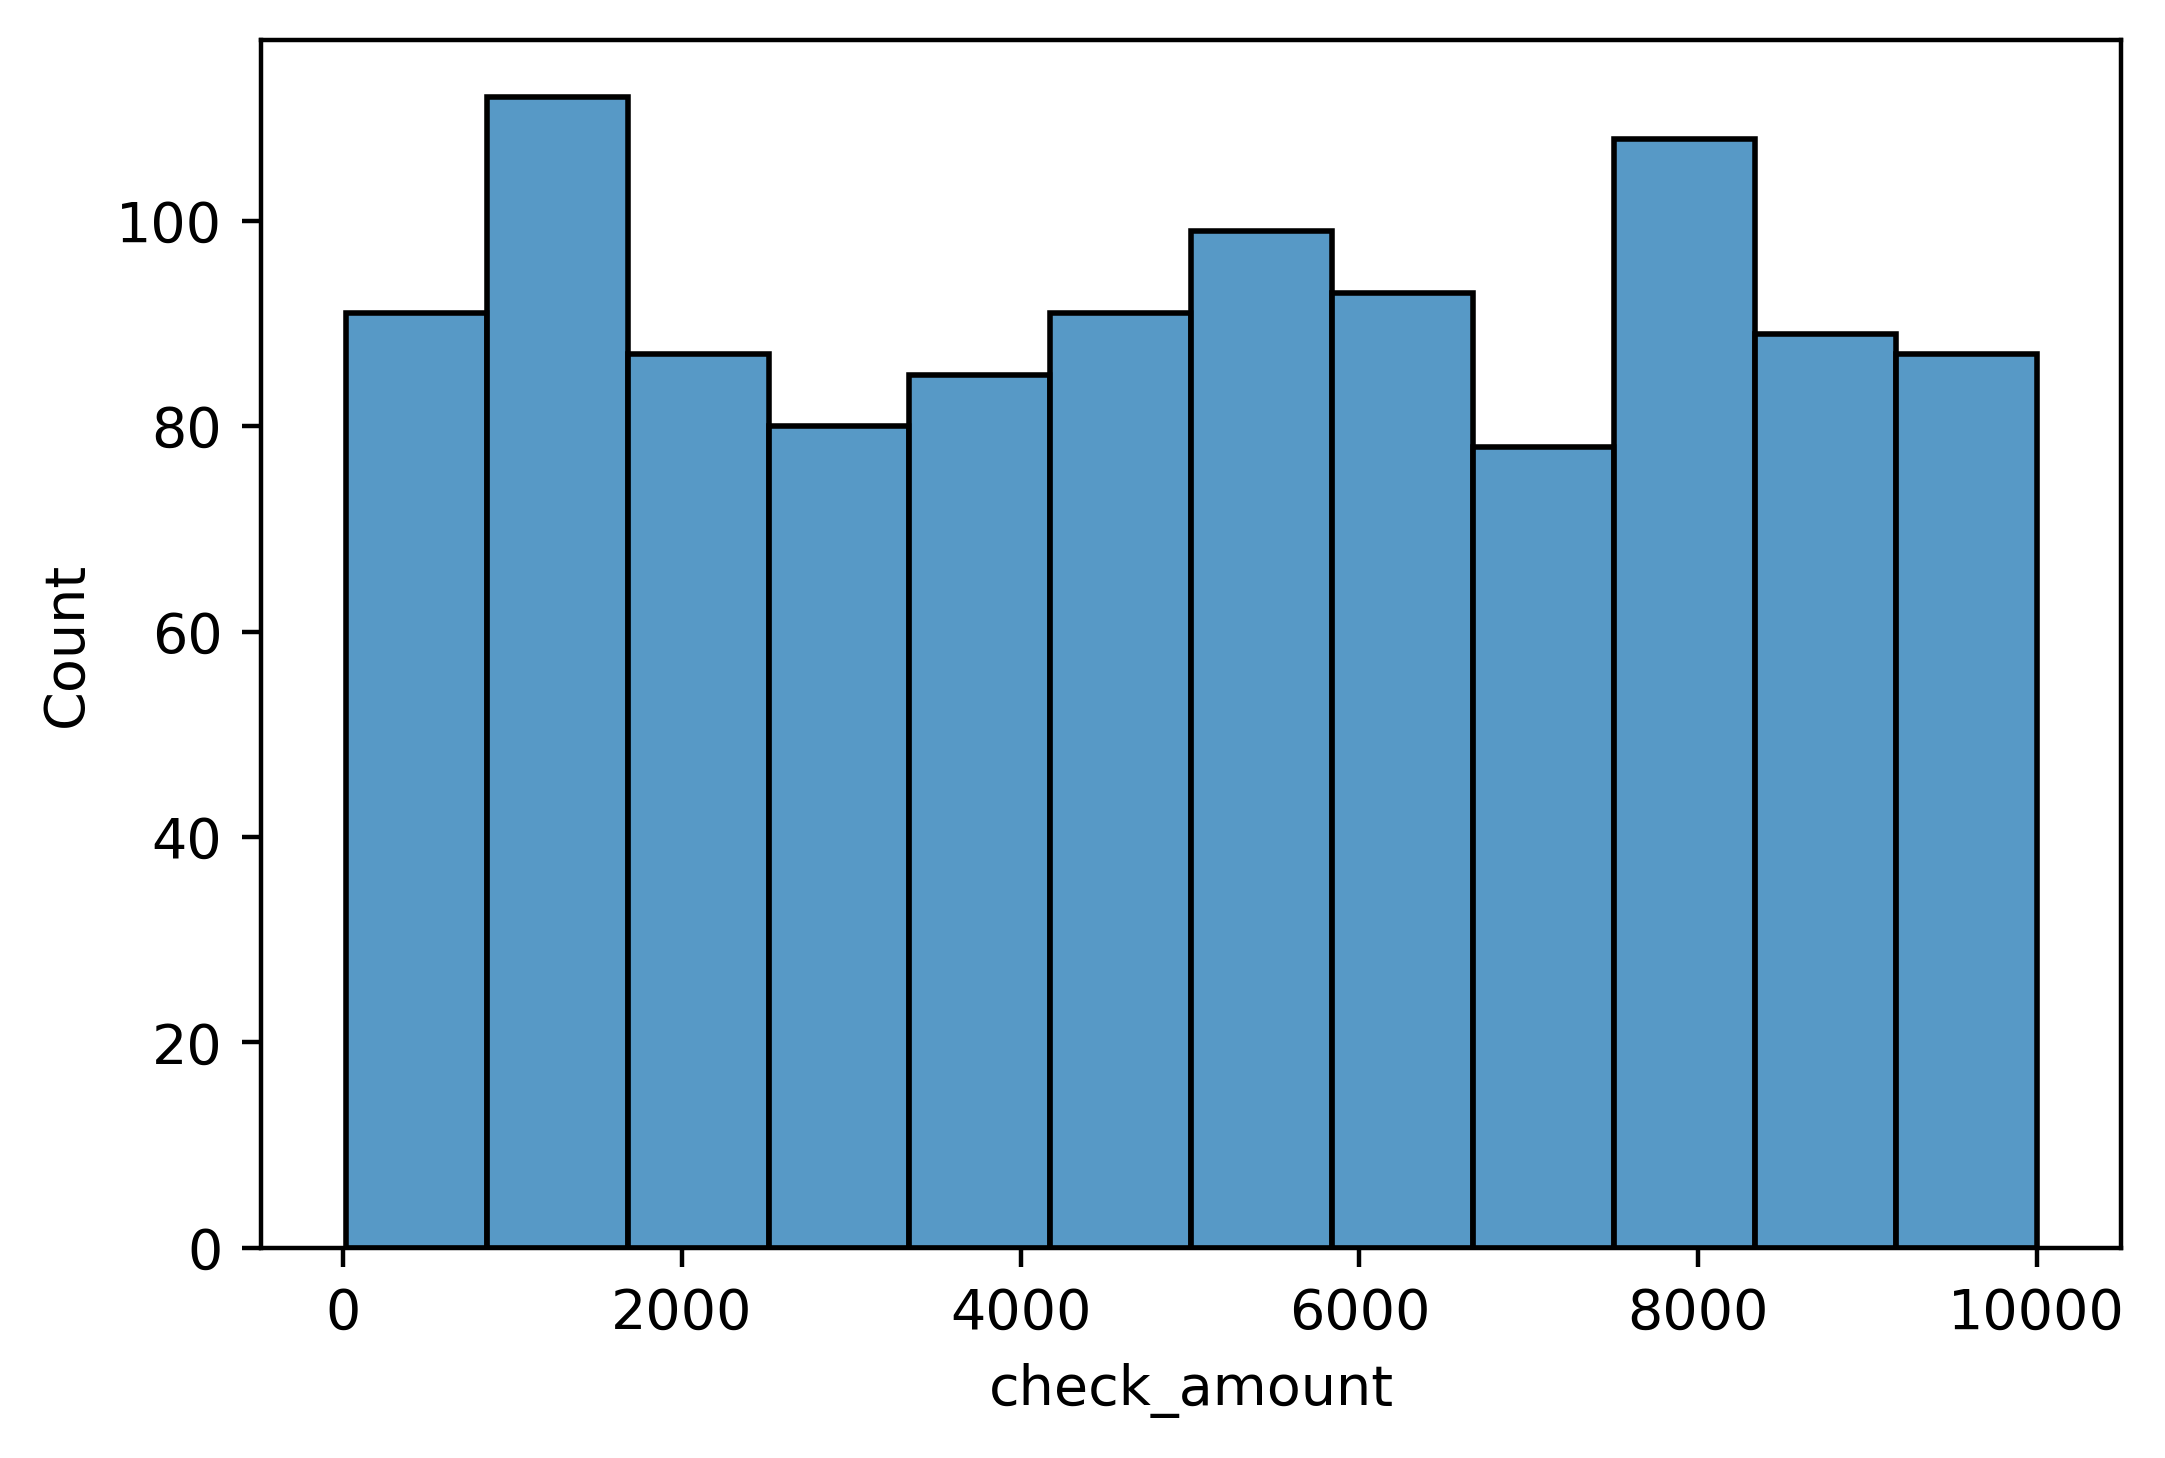

In [20]:
plt.figure(dpi=400) 
sns.histplot(data=df.check_amount)

### Two-Way Analyses

Crosstab of target versus check signed

In [21]:
pd.crosstab(index=df['check_signed'], columns=df['is_fraud'])

is_fraud,0,1
check_signed,,
0,1,3
1,1095,1


when not signed, 3 were fraud and 1 not fraud  
when signed, there was 1 fraud and 1095 not fraud  

In [22]:
pd.crosstab(index=df['check_signed'], columns=df['is_fraud'], normalize='index')

is_fraud,0,1
check_signed,,
0,0.250000,0.750000
1,0.999088,0.000912


In [23]:
0.75 / 0.000912

822.3684210526316

Suggests unsigned check has strong association with fraud

**Check amount vs is_fraud**

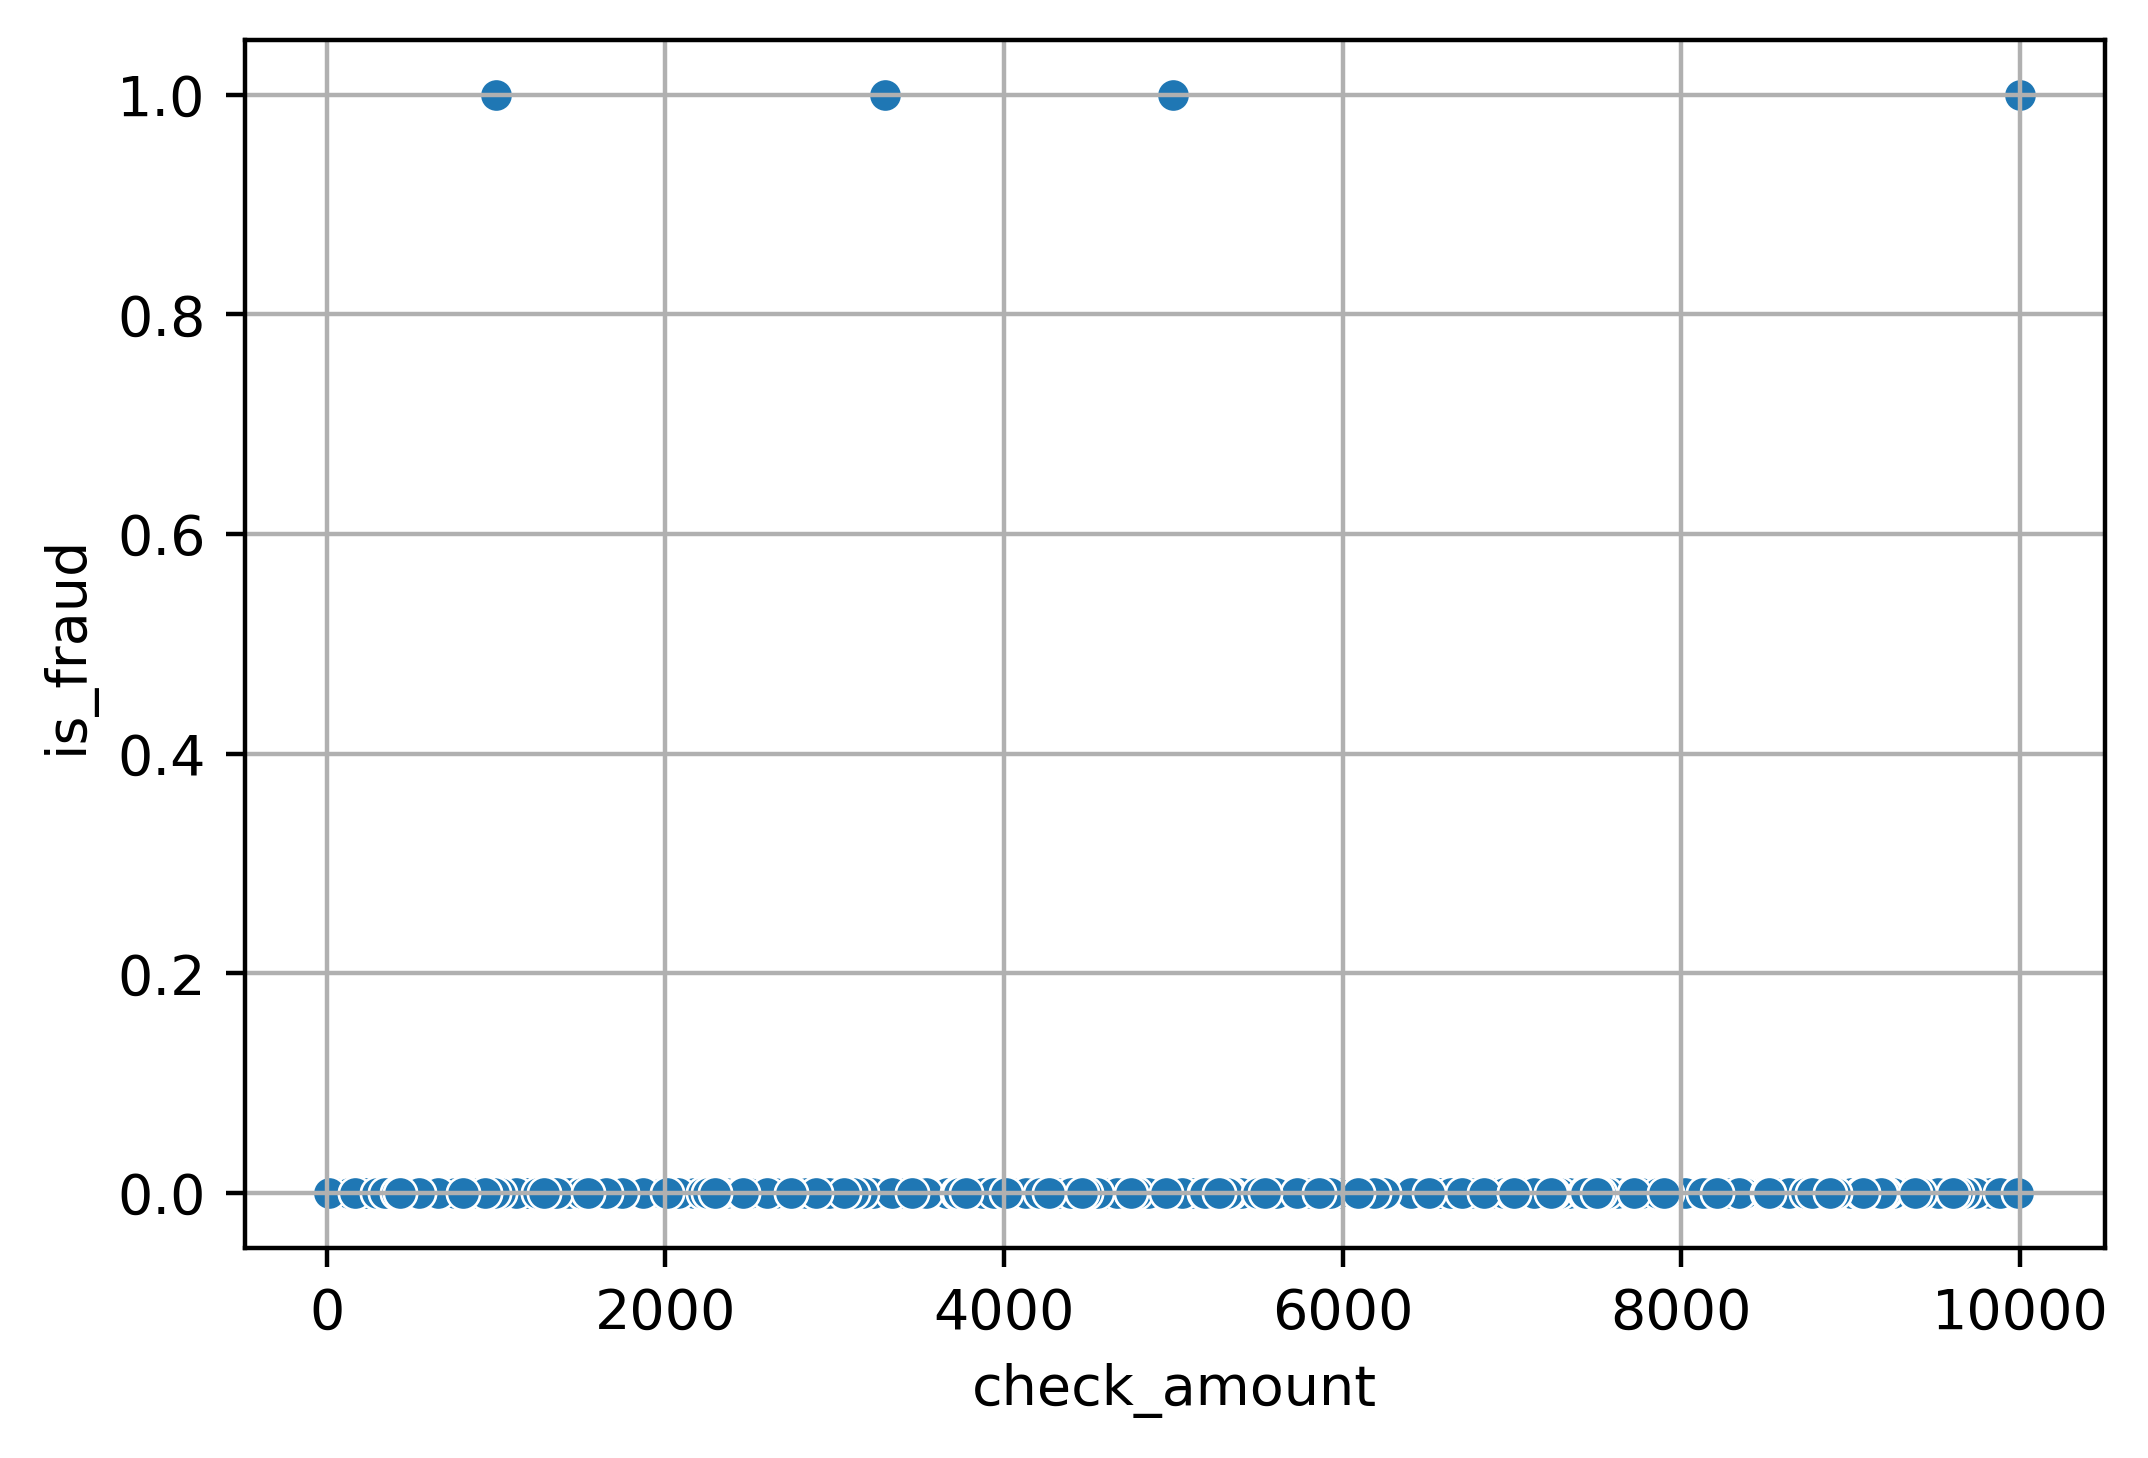

In [25]:
plt.figure(dpi=400) 
sns.scatterplot(x='check_amount', y='is_fraud', data=df)
plt.grid()

The fraudulent check amounts are easily seen, but is there a pattern?

Again, looking at the amounts of the fraudulent checks, it becomes clear: they are multiples of 1000 (for 3 out of 4)

In [19]:
df[df.is_fraud==1]

,checkid,check_amount,check_signed,is_fraud
101,101,10000.00,1,1
510,510,5000.00,0,1
778,778,1000.00,0,1
901,901,4615.59,0,1
